In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
alpha = nx.Graph()
beta = nx.Graph()

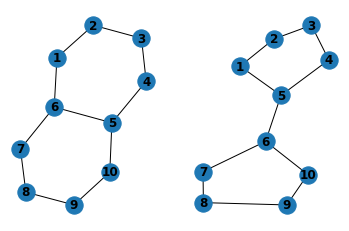

In [2]:
alpha.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (6, 7), (7, 8), (8, 9), (9, 10), (10, 5)])
beta.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6)])
subax1 = plt.subplot(121)
nx.draw(alpha, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(beta, with_labels=True, font_weight='bold')

In [3]:
adj = nx.adjacency_matrix(alpha).todense()
adj

/tmp/ipykernel_61240/2994533232.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(alpha).todense()


matrix([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

In [10]:
def num_of_elements_of_length_k(lst, k):
    #lst: a list in the form {1: a, 2: b}
    #k: the required length
    i = 0
    idx_set = {}
    for idx in range(1, len(lst) + 1):
        if len(lst[idx]) == k:
            idx_set[i] = idx
            i = i + 1
    return i, idx_set

def WL_length_set(G):
    #G is a nx.graph, can compute either from G=nx.Graph or G=nx.from_numpy_matrix(A) where A is adjacency matrix
    """this returns a list of lengths
    for example: 
    [[1, 4, 6],
     [1, 3, 5],
     [1, 2, 4]]
     the first row of the list tells us the number of paths that are connected to node one of length = index - 1
     in this case, first row in second column entry 4 tells us that there are 4 paths that are connected to node 1 with length 2 - 1.
    """ 
    path_set = nx.shortest_path(G)
    length_set = [ {} for _ in range(len(G._node)) ]
    
    for i in range(len(G._node)):
        for j in range(len(G._node)):
            length_set[i][j], the_set = num_of_elements_of_length_k(path_set[i + 1], j +1)
    length_set = [list(idx.values()) for idx in length_set] #convert to a list of lists
    return length_set

def WL_poset(G):
    #G is a nx.graph, can compute either from G=nx.Graph or G=nx.from_numpy_matrix(A) where A is adjacency matrix
    """this returns the list of WL aggregated nodes
    """ 
    p = np.array(WL_length_set(G)).T
    class_set = []
    for k in range(len(G._node)):
        max_num = max(p[k])
        for j in range(1, max_num + 1):
            b = [i +1 for i, n in enumerate(p[k]) if n == j]
            class_set.append(b)
                    
    return class_set
            
        
    
                    

In [7]:
WL_poset(alpha)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [],
 [1, 2, 3, 4, 7, 8, 9, 10],
 [5, 6],
 [],
 [2, 3, 8, 9],
 [1, 4, 7, 10],
 [5, 6],
 [],
 [2, 3, 5, 6, 8, 9],
 [1, 4, 7, 10],
 [1, 4, 7, 10],
 [2, 3, 8, 9],
 [2, 3, 8, 9]]

In [9]:
WL_length_set(alpha)

[[1, 2, 3, 3, 1, 0, 0, 0, 0, 0],
 [1, 2, 2, 2, 2, 1, 0, 0, 0, 0],
 [1, 2, 2, 2, 2, 1, 0, 0, 0, 0],
 [1, 2, 3, 3, 1, 0, 0, 0, 0, 0],
 [1, 3, 4, 2, 0, 0, 0, 0, 0, 0],
 [1, 3, 4, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 3, 1, 0, 0, 0, 0, 0],
 [1, 2, 2, 2, 2, 1, 0, 0, 0, 0],
 [1, 2, 2, 2, 2, 1, 0, 0, 0, 0],
 [1, 2, 3, 3, 1, 0, 0, 0, 0, 0]]

## The following is the scratch in the process of designing WL_poset

In [196]:
a = WL_length_set(alpha)
b = np.array(a).T
print(b)
[i for i, n in enumerate(b[0]) if n == 1]


[[1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 3 3 2 2 2 2]
 [3 2 2 3 4 4 3 2 2 3]
 [3 2 2 3 2 2 3 2 2 3]
 [1 2 2 1 0 0 1 2 2 1]
 [0 1 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [197]:
WL_length_set(beta)

[[1, 2, 3, 2, 2, 0, 0, 0, 0, 0],
 [1, 2, 2, 1, 2, 2, 0, 0, 0, 0],
 [1, 2, 2, 1, 2, 2, 0, 0, 0, 0],
 [1, 2, 3, 2, 2, 0, 0, 0, 0, 0],
 [1, 3, 4, 2, 0, 0, 0, 0, 0, 0],
 [1, 3, 4, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 2, 2, 0, 0, 0, 0, 0],
 [1, 2, 2, 1, 2, 2, 0, 0, 0, 0],
 [1, 2, 2, 1, 2, 2, 0, 0, 0, 0],
 [1, 2, 3, 2, 2, 0, 0, 0, 0, 0]]

In [18]:
# now let's test if the function num_of_elements_in_length_k works
p = nx.shortest_path(alpha)
print(p[1])
num_of_elements_of_length_k(p[1], 3)

{1: [1], 2: [1, 2], 6: [1, 6], 3: [1, 2, 3], 5: [1, 6, 5], 7: [1, 6, 7], 4: [1, 2, 3, 4], 10: [1, 6, 5, 10], 8: [1, 6, 7, 8], 9: [1, 6, 5, 10, 9]}


(3, {0: 3, 1: 5, 2: 7})

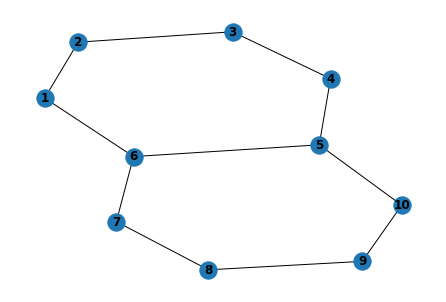

In [21]:
nx.draw(alpha, with_labels=True, font_weight='bold')

In [20]:
nx.shortest_path(alpha)

{1: {1: [1],
  2: [1, 2],
  6: [1, 6],
  3: [1, 2, 3],
  5: [1, 6, 5],
  7: [1, 6, 7],
  4: [1, 2, 3, 4],
  10: [1, 6, 5, 10],
  8: [1, 6, 7, 8],
  9: [1, 6, 5, 10, 9]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  6: [2, 1, 6],
  4: [2, 3, 4],
  5: [2, 1, 6, 5],
  7: [2, 1, 6, 7],
  10: [2, 1, 6, 5, 10],
  8: [2, 1, 6, 7, 8],
  9: [2, 1, 6, 5, 10, 9]},
 3: {3: [3],
  2: [3, 2],
  4: [3, 4],
  1: [3, 2, 1],
  5: [3, 4, 5],
  6: [3, 2, 1, 6],
  10: [3, 4, 5, 10],
  7: [3, 2, 1, 6, 7],
  9: [3, 4, 5, 10, 9],
  8: [3, 2, 1, 6, 7, 8]},
 4: {4: [4],
  3: [4, 3],
  5: [4, 5],
  2: [4, 3, 2],
  6: [4, 5, 6],
  10: [4, 5, 10],
  1: [4, 3, 2, 1],
  7: [4, 5, 6, 7],
  9: [4, 5, 10, 9],
  8: [4, 5, 6, 7, 8]},
 5: {5: [5],
  4: [5, 4],
  6: [5, 6],
  10: [5, 10],
  3: [5, 4, 3],
  1: [5, 6, 1],
  7: [5, 6, 7],
  9: [5, 10, 9],
  2: [5, 4, 3, 2],
  8: [5, 6, 7, 8]},
 6: {6: [6],
  5: [6, 5],
  1: [6, 1],
  7: [6, 7],
  4: [6, 5, 4],
  10: [6, 5, 10],
  2: [6, 1, 2],
  8: [6, 7, 8],
  3: [6, 5, 4, 3],
 